# Unveiling Efficient Supply Chain Clusters: Multidimensional Clustering on Supply Chain Logistics Data

- Full name: **Tam Nguyen Bang**
- Student ID: **475308**

- *1st Year Master's Student of Data Science and Business Analytics*

- *Faculty of Economic Sciences, University of Warsaw*

# Table of content

1. Project motivation
* Required libraries
* Load dataset
2. Dataset information
* Dataset overview
* Handling missing or duplicated data
3. Exploratory Data Analysis (EDA)
4. Clustering
* Find the k based on Elbow analysis
* Find the k based on Silhouette Analysis
* KMeans clustering
* DBSCAN Clustering
5. Post diagnostics
6. Conclusion
7. References


#1. Project motivation

## Literature Review

Customer segmentation is a pivotal aspect of modern business strategy, particularly in supply chain and logistics management. It enables companies to categorize customers based on their purchasing behavior, preferences, and value, thus allowing for more tailored marketing strategies and efficient inventory management. The application of clustering techniques in customer segmentation has garnered significant attention in academic and industrial research, given its ability to uncover patterns and groupings within large datasets.

A substantial body of research highlights the utility of clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN in segmenting customers. These techniques have been instrumental in identifying distinct groups such as high-value customers, infrequent buyers, and those with diverse product preferences. The integration of clustering with customer data such as order frequency, purchase value, and delivery preferences has yielded actionable insights for businesses. Studies demonstrate that such segmentation allows organizations to prioritize customer service for high-value segments, optimize inventory allocation for frequently ordered products, and design targeted marketing campaigns. This approach not only enhances operational efficiency but also improves customer satisfaction and retention (Tsai & Chiu, 2004; Jain et al., 2020).

Moreover, advancements in data analysis and machine learning have expanded the scope of customer segmentation. The inclusion of multidimensional features such as geographical proximity, product diversity, and seasonal purchasing trends has refined the granularity of clusters, enabling a more nuanced understanding of customer behavior. As businesses increasingly adopt data-driven decision-making, customer segmentation via clustering remains a cornerstone for aligning supply chain strategies with market dynamics (Ngai et al., 2009; Kumar & Sharma, 2020).


## Executive Summary

In conclusion, customer segmentation through clustering is an essential tool in contemporary supply chain management, fostering a deeper understanding of customer needs and enhancing operational performance. This project contributes to the customer groups based on order volume, frequency, and product diversity to enable tailored marketing and efficient inventory management. The ongoing evolution of clustering methodologies and the growing availability of customer data promise even greater opportunities for research and application in this field.

## Required libraries

In [31]:
!pip install pandas matplotlib scikit-learn openpyxl

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

## Load dataset

In [32]:
file_path = '/content/Supply chain logisitcs problem (1).xlsx'
xls = pd.ExcelFile(file_path)

order_list = pd.read_excel(xls, 'OrderList')
freight_rates = pd.read_excel(xls, 'FreightRates')
vmi_customers = pd.read_excel(xls, 'VmiCustomers')

#2. Dataset information


Understanding supply chain dynamics is essential for businesses, policymakers, and logistics managers striving to optimize resource allocation, enhance operational efficiency, and design sustainable strategies. This project, "Unveiling Efficient Supply Chain Clusters: Multidimensional Clustering on Supply Chain Logistics Data," utilizes the Supply Chain Logistics Problem Dataset from Brunel University to identify meaningful clusters of logistics operations based on transportation costs, warehouse capacities, and operational efficiency metrics.

## Dataset overview

The Supply Chain Logistics Problem Dataset is a comprehensive dataset, accessible from Brunel University London, detailing logistics operations and supply chain constraints across various dimensions. The dataset provides key insights into transportation, storage, and production factors critical to supply chain optimization.

Dataset Features: The dataset includes the following attributes:


* Order Details: Information about customer orders, including origin, destination, order quantity, and shipping preferences.


* Freight Rates: Transportation costs between various origins and destinations, segmented by modes of transport and weight categories.


* Warehouse Costs and Capacities:
  * Warehouse operating costs.
  * Storage capacities to assess resource allocation strategies.


* Production and Inventory Data:
  * Product availability at manufacturing plants.
  * Production rates and constraints.
  * Vendor-Managed Inventory (VMI) Customers: Insights into VMI practices, helping identify customer-level supply chain patterns.

The dataset is publicly accessible and can be downloaded from the Brunel Figshare Portal: Supply Chain Logistics Problem Dataset, https://brunel.figshare.com/articles/dataset/Supply_Chain_Logistics_Problem_Dataset/7558679?file=20162015

This project aims to bridge the gap between theoretical supply chain models and real-world logistics challenges by leveraging the power of data-driven clustering techniques.


In [3]:
print(order_list.head())
print(vmi_customers.head())
print(freight_rates.head())

       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   8

The OrderList provides a granular view of orders and their logistics details, suitable for clustering customers or analyzing shipping patterns.

The VMI Customers dataset complements the main order data by linking customers to specific plants.

The FreightRates dataset offers cost details essential for optimizing transportation routes and evaluating logistics efficiency.

## Handling missing or duplicated data

In [48]:
print("Checking for duplicate rows in OrderList:")
duplicates_order = order_list.duplicated().value_counts()
print(duplicates_order)

order_list.drop_duplicates(inplace=True)
print("Duplicates removed from OrderList.")

print("\nChecking for duplicate rows in FreightRates:")
duplicates_freight = freight_rates.duplicated().value_counts()
print(duplicates_freight)

freight_rates.drop_duplicates(inplace=True)
print("Duplicates removed from FreightRates.")

print("\nChecking for duplicate rows in VMICustomers:")
duplicates_vmi = vmi_customers.duplicated().value_counts()
print(duplicates_vmi)

vmi_customers.drop_duplicates(inplace=True)
print("Duplicates removed from VMICustomers.")

order_list_null_percentage = order_list.isnull().sum() * 100 / order_list.shape[0]
freight_rates_null_percentage = freight_rates.isnull().sum() * 100 / freight_rates.shape[0]
vmi_customers_null_percentage = vmi_customers.isnull().sum() * 100 / vmi_customers.shape[0]

print("\nPercentage of missing values in OrderList:")
print(order_list_null_percentage)

print("\nPercentage of missing values in FreightRates:")
print(freight_rates_null_percentage)

print("\nPercentage of missing values in VMICustomers:")
print(vmi_customers_null_percentage)

Checking for duplicate rows in OrderList:
False    9215
Name: count, dtype: int64
Duplicates removed from OrderList.

Checking for duplicate rows in FreightRates:
False    1537
Name: count, dtype: int64
Duplicates removed from FreightRates.

Checking for duplicate rows in VMICustomers:
False    14
Name: count, dtype: int64
Duplicates removed from VMICustomers.

Percentage of missing values in OrderList:
Order ID                0.0
Order Date              0.0
Origin Port             0.0
Carrier                 0.0
TPT                     0.0
Service Level           0.0
Ship ahead day count    0.0
Ship Late Day count     0.0
Customer                0.0
Product ID              0.0
Plant Code              0.0
Destination Port        0.0
Unit quantity           0.0
Weight                  0.0
dtype: float64

Percentage of missing values in FreightRates:
Carrier         0.0
orig_port_cd    0.0
dest_port_cd    0.0
minm_wgh_qty    0.0
max_wgh_qty     0.0
svc_cd          0.0
minimum cost    0.0

OrderList:
The dataset contains no duplicate rows, 0% missing values across all columns

FreightRates:
There were no duplicate rows, no missing values are observed in this dataset.

VMICustomers:
The VMICustomers dataset also contained no duplicates, 0% missing values.

The datasets (OrderList, FreightRates, VMICustomers) are clean, complete, and duplicate-free. These qualities make the data well-suited for clustering, exploratory data analysis, and supply chain optimization tasks without requiring additional preprocessing steps for data integrity.

# Exploratory Data Analysis (EDA)


Supply chain logistics datasets require Exploratory Data Analysis (EDA) as it is a crucial step in uncovering patterns, identifying anomalies, and highlighting relationships within the data. This process is essential for making well-informed decisions in supply chain optimization, as it enables the development of tailored strategies to address diverse operational needs and challenges. By leveraging EDA, businesses can gain deeper insights into transportation costs, warehouse utilization, customer segmentation, and production dynamics, ensuring that resource allocation and logistics planning are both efficient and effective.

Categorical Columns:
Index(['Origin Port', 'Carrier', 'Service Level', 'Customer', 'Plant Code',
       'Destination Port'],
      dtype='object')


<ipython-input-10-f1a92250cd81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list, y=column, order=order_list[column].value_counts().index, palette='viridis')


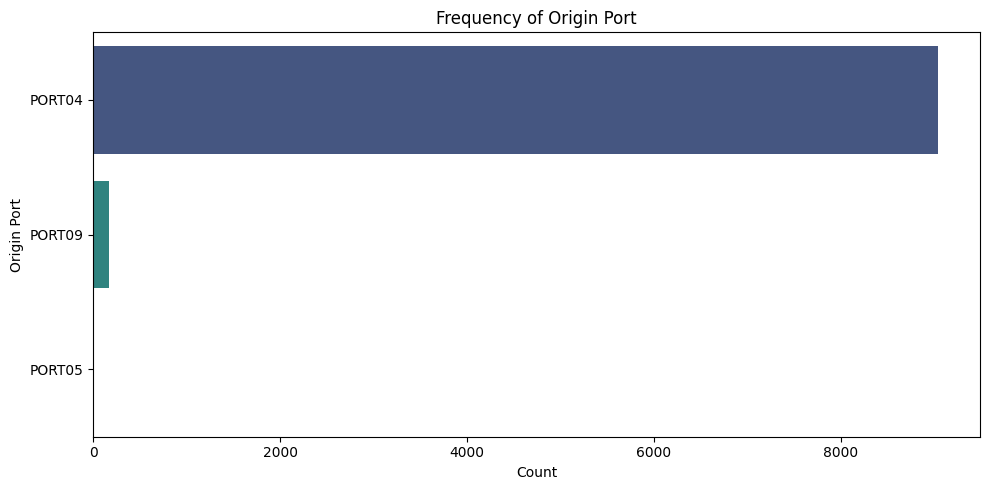

<ipython-input-10-f1a92250cd81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list, y=column, order=order_list[column].value_counts().index, palette='viridis')


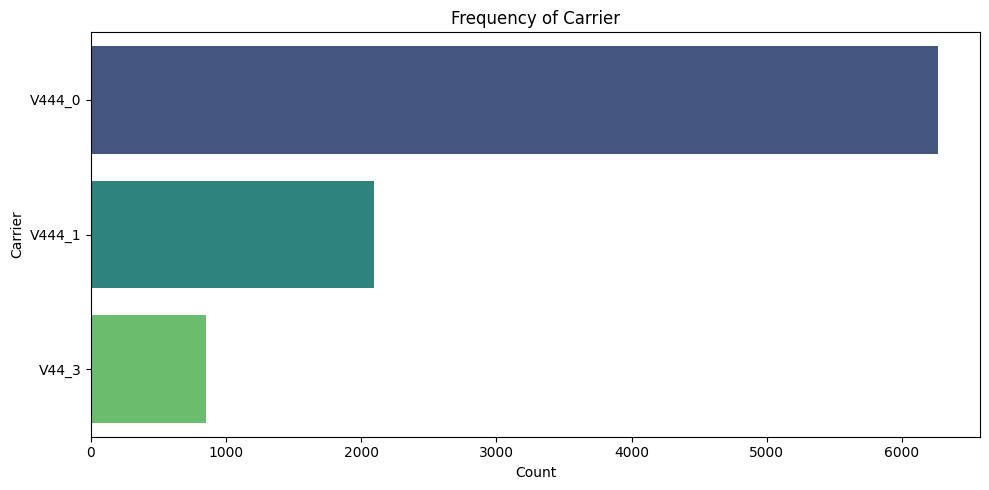

<ipython-input-10-f1a92250cd81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list, y=column, order=order_list[column].value_counts().index, palette='viridis')


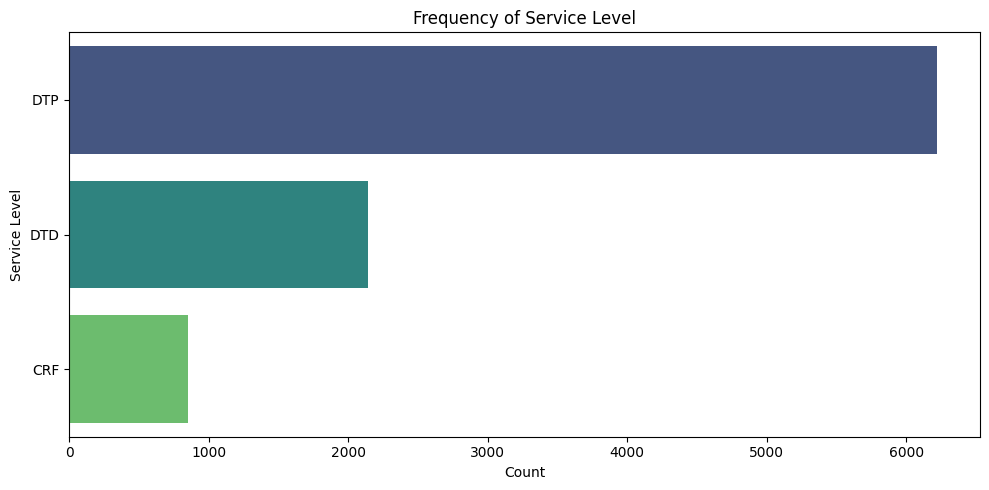

<ipython-input-10-f1a92250cd81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list, y=column, order=order_list[column].value_counts().index, palette='viridis')


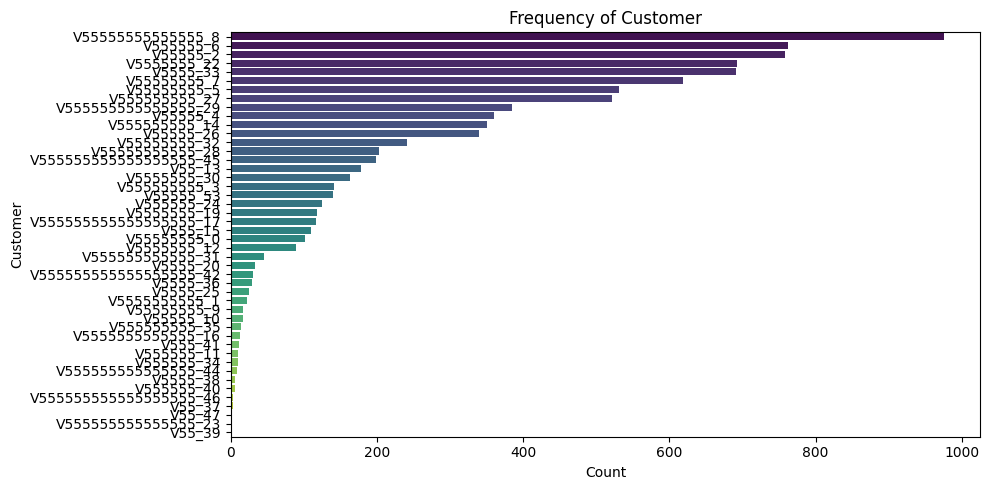

<ipython-input-10-f1a92250cd81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list, y=column, order=order_list[column].value_counts().index, palette='viridis')


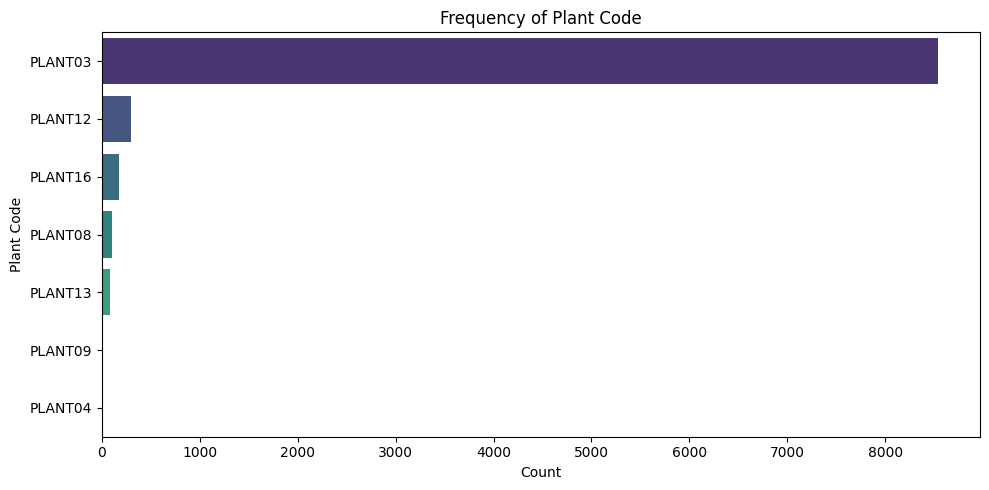

<ipython-input-10-f1a92250cd81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list, y=column, order=order_list[column].value_counts().index, palette='viridis')


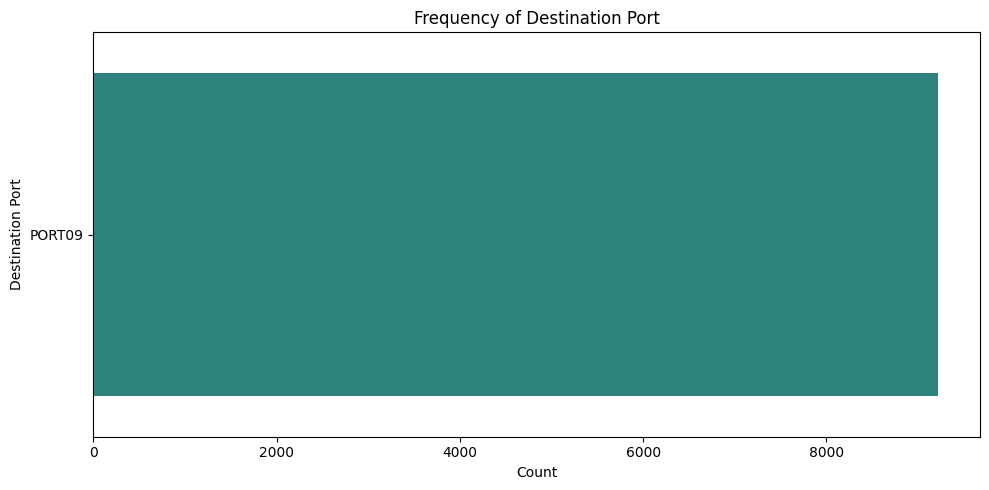

In [10]:
categorical_columns = order_list.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

# Plot frequency for each categorical feature
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=order_list, y=column, order=order_list[column].value_counts().index, palette='viridis')
    plt.title(f'Frequency of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


1. Frequency of Origin Port: The data reveals that PORT04 is the most commonly used origin port, with a significantly higher frequency compared to others.
PORT09 and PORT05 have much lower usage, indicating they are less dominant in shipping operations.
This suggests a concentration of shipping activities at specific hubs, possibly due to strategic geographic or economic advantages of PORT04.

2. Frequency of Carrier: Carrier V444_0 is the most frequently used, followed by V444_1 and V44_3.
The dominance of V444_0 might indicate its reliability, cost-effectiveness, or extensive service network.
The distribution suggests that a few carriers handle the majority of shipments, with lesser reliance on alternative carriers.

3. Frequency of Service Level: DTP (Door-to-Port) is the most commonly chosen service level, followed by DTD (Door-to-Door) and CRF (Cost and Freight).
The preference for DTP suggests that many customers or businesses prefer handling the last-mile delivery themselves, potentially to save costs or maintain control over distribution.

4. Frequency of Customer: The top customers, such as V555555555, contribute significantly to the dataset's activity, with counts nearing 1,000 orders.
There is a steep drop-off after the top few customers, indicating that the business relies heavily on a small number of key clients.
Tailored strategies could be developed to maintain and grow relationships with these high-frequency customers.

5. Frequency of Plant Code: PLANT03 is overwhelmingly the most utilized plant, with far greater shipping activity compared to other plants like PLANT12, PLANT16, and PLANT08.
This could indicate that PLANT03 is a central manufacturing or distribution hub, likely due to capacity, location advantages, or production capabilities.
Other plants, with much lower frequencies, might serve niche markets or act as secondary locations.

6. Frequency of Destination Port: PORT09 dominates as the destination port, suggesting a primary focus of shipping operations to this port.
The lack of diversity in destination ports could point to a regional concentration of demand or a focus on a particular market.


In [6]:
customer_data = order_list.groupby('Customer').agg({
    'Unit quantity': 'sum',  # Total quantity ordered
    'Weight': 'sum',         # Total shipment weight
}).reset_index()

customer_data.rename(columns={'Unit quantity': 'TotalQuantity', 'Weight': 'TotalWeight'}, inplace=True)

print(customer_data.head())

                 Customer  TotalQuantity  TotalWeight
0  V555555555555555555_17         266457   611.338232
1  V555555555555555555_42         470632   297.547486
2  V555555555555555555_45         116136  4396.620606
3  V555555555555555555_46          12080     3.512839
4     V555555555555555_23            375     4.280000


# Clustering



Clustering is a key data analysis technique that groups related data points based on shared characteristics, uncovering hidden patterns and relationships. By organizing data points into logical groupings, clustering provides valuable insights into the underlying structure of supply chain operations, enabling a deeper understanding of intricate interactions between variables such as shipping routes, inventory levels, and customer order behaviors.
For example, in a supply chain logistics dataset, clustering can help categorize customers into distinct segments based on their order quantities, shipment weights, or geographic locations. Similarly, it can identify clusters of transportation routes that share similar cost structures or delivery patterns. This information is invaluable for optimizing logistics strategies, streamlining inventory management, and designing targeted solutions for different customer groups.

## Find the k based on Elbow analysis

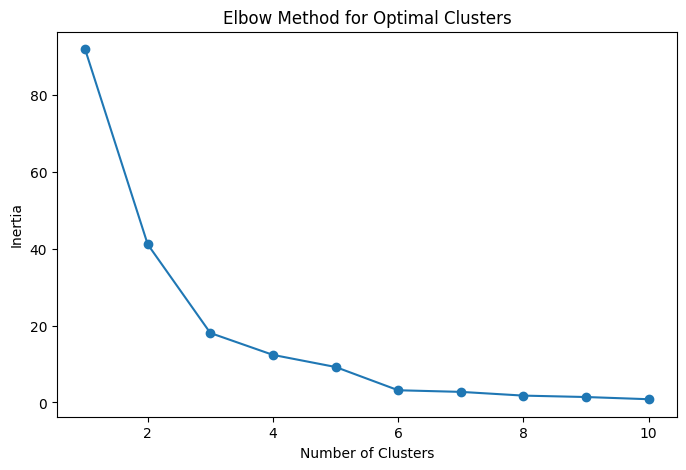

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalQuantity', 'TotalWeight']])

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The Elbow Point is observed at k=3, where the inertia (within-cluster sum of squares) starts to flatten significantly.

## Find the k based on Silhouette Analysis

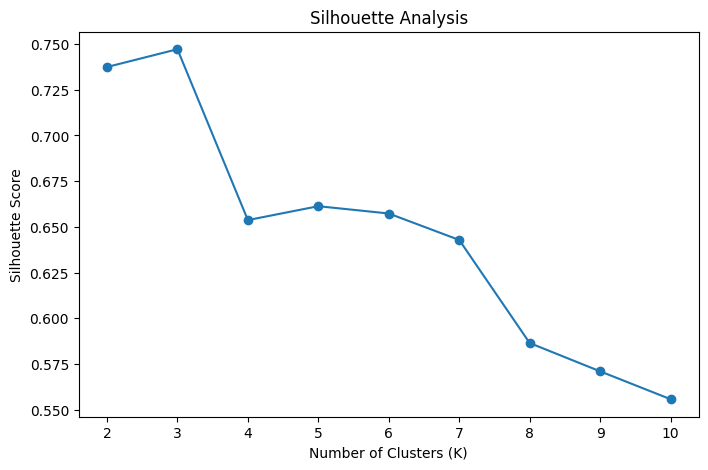

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(2, 11)

silhouette_scores = []

The Silhouette Score is highest at k=3, indicating that 3 clusters might provide the best-defined separation between clusters.

## KMeans clustering

A common unsupervised machine learning technique for grouping a dataset into independent, non-overlapping groups or clusters is KMeans clustering. Transferring data points to clusters iteratively and optimising cluster centroids until convergence is how the method operates. Its goal is to cluster together comparable data points by minimising the within-cluster sum of squared distances.

Choosing a right k for KMeans clustering is one of the crucial and difficult task for clustering. In this case we can use Elbow score to determine the right k for the KMeans clustering.

*For both analysis, we can observe that k=3 is the optimal number for clustering.*

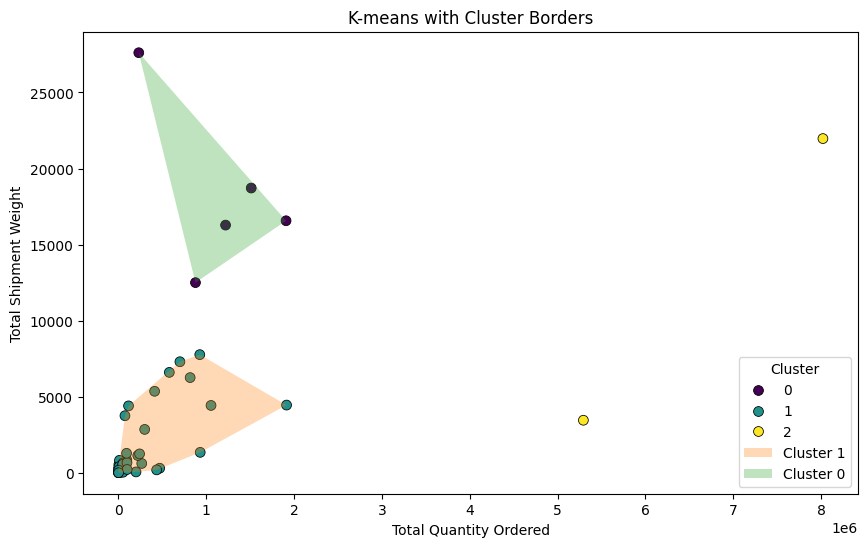

In [23]:
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalQuantity', y='TotalWeight', hue='Cluster', palette='viridis', s=50, edgecolor='k')

clusters = customer_data['Cluster'].unique()
for cluster in clusters:
    cluster_points = customer_data[customer_data['Cluster'] == cluster][['TotalQuantity', 'TotalWeight']].values
    if len(cluster_points) >= 3:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 0], hull_points[:, 1], alpha=0.3, label=f'Cluster {cluster}')

plt.title('K-means with Cluster Borders')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Total Shipment Weight')
plt.legend(title='Cluster')
plt.show()


The graph illustrates customer segmentation using K-means clustering, with cluster borders defined by Convex Hulls. The data is plotted based on Total Quantity Ordered (x-axis) and Total Shipment Weight (y-axis), with three distinct clusters identified:

* Cluster 0 (Green):

Represents customers who place moderate to high shipment weight orders (ranging between 15,000 and 30,000) with relatively low to moderate quantities.
This cluster might indicate customers ordering fewer but heavier or bulkier products, potentially industrial or specialty goods.


* Cluster 1 (Orange):

Comprises customers with small to moderate shipment weights (below 5,000) and low to moderate quantities ordered.
These customers appear to be regular or mid-sized clients ordering lightweight or mid-weight products in consistent quantities.


* Cluster 2 (Yellow):

Contains customers with the highest order quantities (exceeding 7 million units) but relatively low shipment weight.
This segment likely represents customers ordering lightweight products in bulk, such as consumer goods or high-volume, low-density items.

<ipython-input-52-c07ff1393713>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='Cluster', palette='Set2')


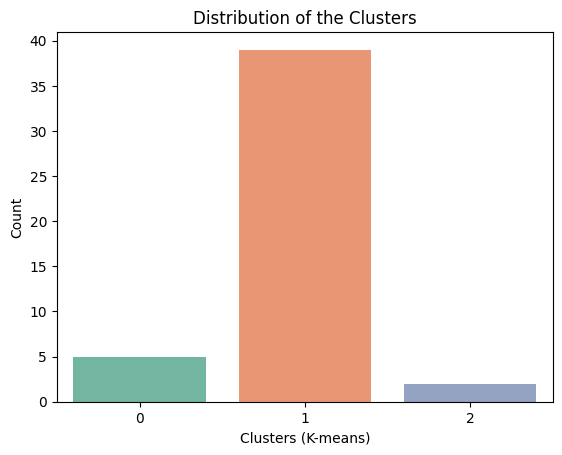

In [52]:
sns.countplot(data=customer_data, x='Cluster', palette='Set2')

plt.title('Distribution of the Clusters')
plt.xlabel('Clusters (K-means)')
plt.ylabel('Count')
plt.show()

* Cluster 1 Dominance: Cluster 1 has the highest count of data points, significantly outnumbering the other clusters. This suggests that the majority of the dataset shares similar characteristics, forming a large, homogeneous group.Investigate its defining features to better understand what makes it the dominant cluster. If necessary, consider splitting this cluster further to uncover subgroups.

* Clusters 0 and 2: These smaller clusters likely represent specialized or niche groups with distinct patterns or behaviors that set them apart from the main group in Cluster 1. Perform detailed analyses to understand the unique traits of these smaller clusters. Tailor strategies to address their specific needs or capitalize on their distinct characteristics.

## DBSCAN Clustering

<ipython-input-53-eca57729ba7a>:7: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  k = kde.gaussian_kde([x, y])


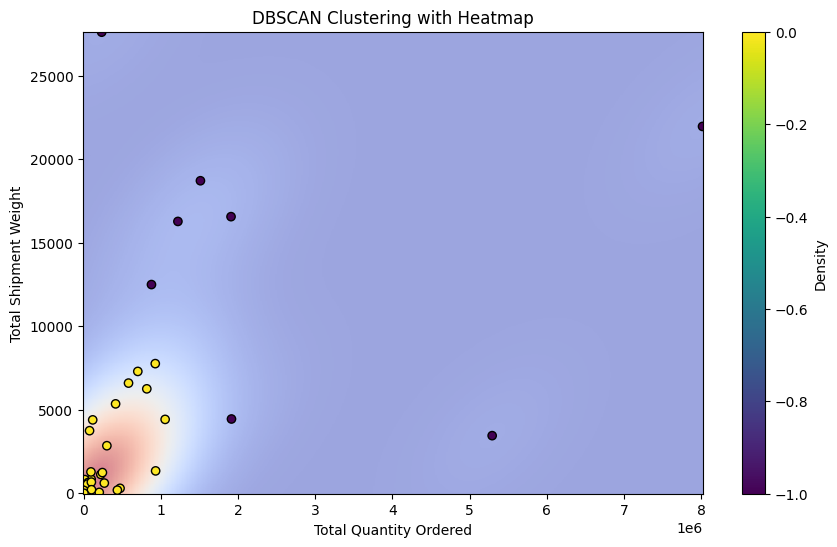

In [53]:
from scipy.stats import kde
import numpy as np

x = customer_data['TotalQuantity']
y = customer_data['TotalWeight']
k = kde.gaussian_kde([x, y])

xi, yi = np.mgrid[x.min():x.max():500j, y.min():y.max():500j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='coolwarm', alpha=0.5)
plt.scatter(x, y, c=customer_data['DBSCAN_Cluster'], cmap='viridis', edgecolor='k')

plt.title('DBSCAN Clustering with Heatmap')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Total Shipment Weight')
plt.colorbar(label='Density')
plt.show()

Density-Based Clustering: The heatmap overlay shows high-density regions in red near the bottom-left corner of the graph, where most data points (Cluster 0) are concentrated.
This indicates that the majority of orders are low in quantity and shipment weight, representing a significant customer group likely requiring small, frequent shipments.


Noise Points (Cluster -1): Purple points scattered across the plot are classified as noise by DBSCAN. These represent outliers that do not meet the density criteria. Noise points are spread out, with some exhibiting extremely high shipment weights or quantities, such as:
 - Points near the top of the graph: Representing customers with very heavy shipments.
 - Points on the far-right side: Representing customers with extremely high order quantities but low shipment weights (bulk lightweight goods).

In [14]:
from sklearn.metrics import adjusted_rand_score

# Compare K-Means and DBSCAN
ari_kmeans_dbscan = adjusted_rand_score(customer_data['Cluster'], customer_data['DBSCAN_Cluster'])
print(f"Adjusted Rand Index (K-Means vs DBSCAN): {ari_kmeans_dbscan}")

Adjusted Rand Index (K-Means vs DBSCAN): 0.8692824715659236


We use Adjusted Rand Index (ARI) to evaluate clustering results between the K-Means and DBSCAN algorithms, which is a metric to measure the agreement between two clustering results. The ARI value of 0.869 indicates a strong agreement between the clustering results from K-Means and DBSCA in high similarity. In other words, both clustering approaches are reliable for this dataset.

#Post diagnostics

In [25]:
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalQuantity': ['mean', 'median', 'sum', 'count'],
    'TotalWeight': ['mean', 'median', 'sum', 'count']
})

cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.reset_index(inplace=True)

print("Cluster Summary Statistics:")
print(cluster_summary)

Cluster Summary Statistics:
   Cluster  TotalQuantity_mean  TotalQuantity_median  TotalQuantity_sum  \
0        0        1.150495e+06             1220461.0            5752476   
1        1        2.678653e+05               93382.0           10446746   
2        2        6.657046e+06             6657046.5           13314093   

   TotalQuantity_count  TotalWeight_mean  TotalWeight_median  TotalWeight_sum  \
0                    5      18336.100049        16567.123311     91680.500246   
1                   39       1692.689458          551.578513     66014.888881   
2                    2      12711.105699        12711.105699     25422.211397   

   TotalWeight_count  
0                  5  
1                 39  
2                  2  


From this, we can have some suggestions such as:

* Optimize Operations:
For Cluster 1, focus on efficient, low-cost shipping for lightweight goods.
For Clusters 0 and 2, prioritize logistics optimization for heavy and bulk shipments.

* Customer-Specific Strategies:
Leverage the high contribution of Cluster 2 for targeted resource allocation and strong partnerships.
Monitor the diverse nature of Cluster 1 to identify potential for upselling or tailored services.

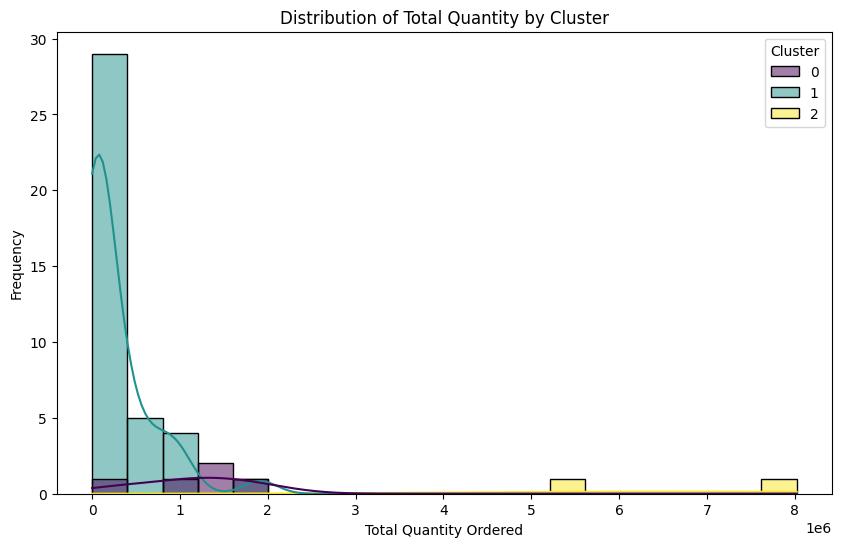

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_data, x='TotalQuantity', hue='Cluster', kde=True, palette='viridis', bins=20)
plt.title('Distribution of Total Quantity by Cluster')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

Dominance of Cluster 1:
Most customers belong to Cluster 1, contributing smaller but frequent orders.
This cluster's volume drives operational efficiency through scalable logistics strategies.


Key Contribution of Cluster 2:
While Cluster 2 is the smallest group, its extremely high quantities make it crucial for revenue and resource allocation.
Tailored supply chain solutions could further enhance service efficiency for this group.

Cluster 0's Role:
Cluster 0 fills the middle ground between the small-scale Cluster 1 and large-scale Cluster 2, balancing moderate order quantities.

<ipython-input-27-5384eab69ddd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Cluster', y='TotalWeight', palette='viridis')


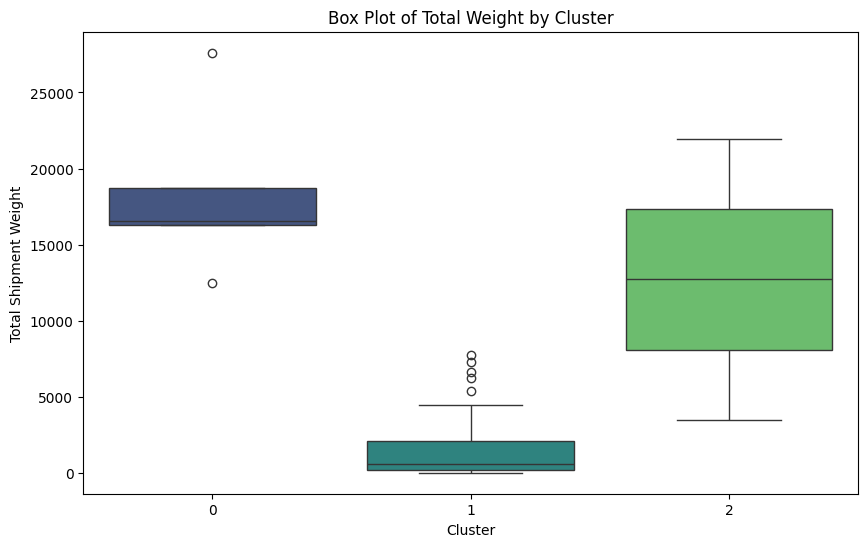

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='Cluster', y='TotalWeight', palette='viridis')
plt.title('Box Plot of Total Weight by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Shipment Weight')
plt.show()

Cluster 0: High and consistent weights with occasional large outliers.

Cluster 1: Primarily lightweight shipments with notable outliers, indicating potential diversity in products or orders.

Cluster 2: Moderate to heavy weights, consistent across the group.
Diversity in Cluster 1:

The wide range and outliers in Cluster 1 suggest that this group is more diverse compared to Clusters 0 and 2, which are more homogenous.
Clusters 0 and 2 may require specialized logistics for heavy shipments.
Cluster 1 may benefit from flexible and scalable shipping solutions to accommodate the diversity in shipment weights.

In [29]:
# Extract and display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Rescale to original units
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['TotalQuantity', 'TotalWeight'])
cluster_centers_df['Cluster'] = range(len(cluster_centers_df))

# Display the cluster centers
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
   TotalQuantity   TotalWeight  Cluster
0   1.914858e+06   4449.030135        0
1   6.573558e+04    424.816393        1
2   1.547324e+06  17188.605197        2
3   8.020417e+06  21970.357577        3
4   5.293676e+06   3451.853820        4
5   7.489080e+05   6283.098463        5
6   2.326810e+05  27614.730000        6
7   1.637123e+05   3664.920405        7
8   6.127260e+05    609.093509        8
9   8.778240e+05  12499.954655        9


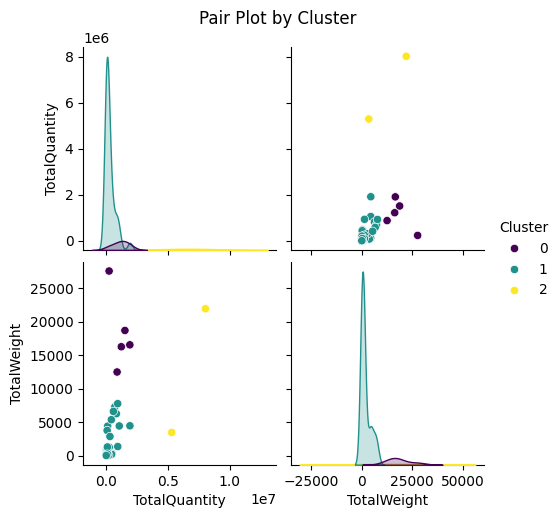

In [30]:
# Pair plot to explore relationships
sns.pairplot(customer_data, vars=['TotalQuantity', 'TotalWeight'], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot by Cluster', y=1.02)
plt.show()

The clusters show minimal overlap, indicating that the segmentation is effective. Each cluster demonstrates distinct patterns in the relationship between shipment weights and order quantities.

For most clusters, Total Shipment Weight tends to increase with Total Quantity Ordered, but Cluster 2 deviates from this pattern, suggesting high quantities of lightweight goods.
Cluster Importance:

Cluster 1 dominates in frequency, representing the largest group of customers.
Cluster 0 balances moderate order sizes with heavy shipments, likely representing stable, medium-scale clients.
Cluster 2 has the fewest customers but contributes significantly due to large order volumes.

# Conclusion

This clustering project effectively segmented customers in the supply chain logistics dataset based on key features such as total quantity ordered and total shipment weight. Using K-Means and DBSCAN clustering algorithms, we identified three distinct customer groups, each representing unique purchasing and logistical behaviors.

**Cluster 1**, the largest group, consists of small-scale customers placing frequent, lightweight orders, requiring cost-effective and scalable logistics solutions. **Cluster 0** represents medium-to-large customers with bulk, heavy shipments, while **Cluster 2**, though the smallest, includes high-value customers placing massive bulk orders, making it a strategic focus for tailored logistics and customer relationship management. The clustering analysis, supported by an ARI of 0.869, demonstrated strong consistency between algorithms and provided actionable insights into operational efficiency, customer prioritization, and strategic planning. By leveraging these insights, businesses can optimize logistics, enhance customer satisfaction, and strengthen relationships with high-value clients, driving overall supply chain efficiency and growth.

# References


Tsai, C.-F., & Chiu, C.-C. (2004). "A purchase-based market segmentation methodology." Expert Systems with Applications.

Jain, A. K., Murty, M. N., & Flynn, P. J. (2020). "Data clustering: A review." ACM Computing Surveys.

Ngai, E. W. T., Xiu, L., & Chau, D. C. K. (2009). "Application of data mining techniques in customer relationship management." Expert Systems with Applications.

Kumar, D., & Sharma, K. (2020). "Emerging trends in customer segmentation using machine learning techniques." Journal of Retailing and Consumer Services.